<a href="https://colab.research.google.com/github/ashrafkvt/analyse_zomato_data/blob/main/analyse_zomato_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
!pip install wget

In [18]:
import wget
import pandas as pd

download_url = "https://drive.google.com/uc?id=19Chq5qFLumPApztAM9UFhWCG8Uiutb9f"
filename = wget.download(download_url)

df = pd.read_csv(filename)
print(df.head(10))


                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [19]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


Text(0.5, 0, 'Type of restaurant')

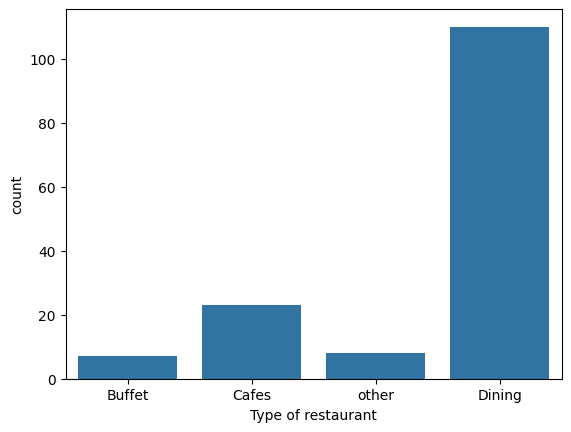

In [20]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

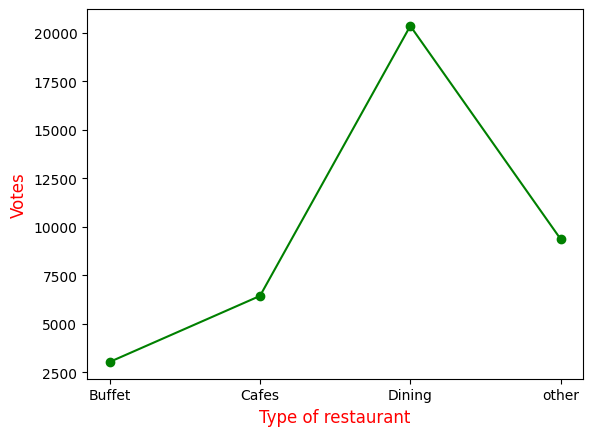

In [21]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
# grouped_data
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=12)
plt.ylabel("Votes", c="red", size=12)

In [47]:
max_votes = df['votes'].max()
rest_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
rest_with_max_votes.to_frame().iloc[0,0]

'Empire Restaurant'

<Axes: xlabel='online_order', ylabel='count'>

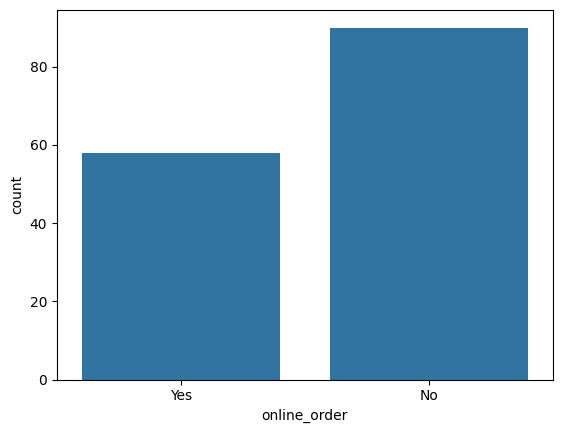

In [55]:
sns.countplot(x=df['online_order'])